In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from imutils import paths

In [ ]:
dataset = "/content/drive/My Drive/Coding/detect_duplicate_dataset/dataset"
read = 0
skip = 4
avgs = []
width = 5
height = 250
img = "/content/drive/My Drive/Coding/output/images/database1.png"

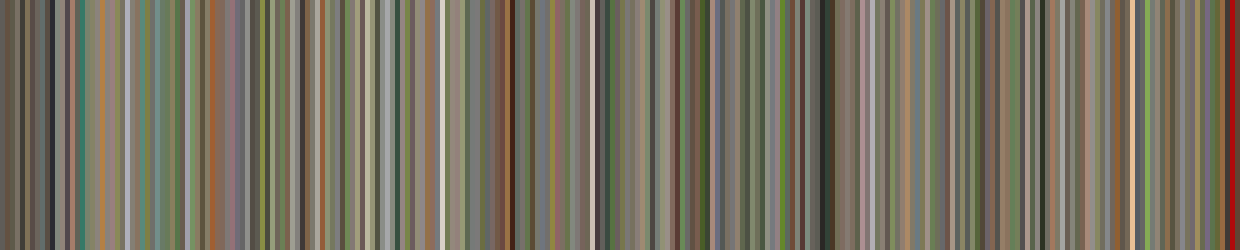

In [ ]:
imagePaths = list(paths.list_images(dataset))

for imagePath in imagePaths:
  image = cv2.imread(imagePath)
  read += 1

  if skip == 0 or read % skip ==0:
    avg = cv2.mean(image)[:3]
    avgs.append(avg)
  
avgs = np.array(avgs, dtype="int")

bw = width
barcode = np.zeros((height, len(avgs)*bw, 3), dtype='uint8')

for (i, avg) in enumerate(avgs):
  start = (i*bw,0)
  end = (i*bw+bw, height)
  cv2.rectangle(barcode, start, end, avg.astype("uint8").tolist(), -1)

cv2.imwrite(img, barcode)
cv2_imshow(barcode)

In [ ]:
drive.flush_and_unmount()